# SD212: Graph mining
## Lab 2: Graph models

You will learn to generate random graphs.

## Import

In [1]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings('ignore')

## 1. Erdos-Renyi graphs

The `networkx` package contains functions to generate random graphs.

In [6]:
n = 200
p = 0.01

In [7]:
graph = nx.erdos_renyi_graph(n,p)

In [8]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 200
Number of edges: 216
Average degree:   2.1600


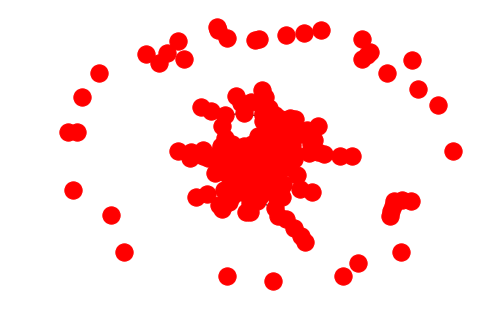

In [9]:
nx.draw(graph)

## To do

* Generate several instances of the graph and observe the results.
* Plot the average size of the largest connected component of the graph with respect to $p$. What is the critical value for $p$?
* Plot the average degree of nodes belonging to the largest connected component with respect to $p$. Compare this value to $np$ and interpret the results.

**Hint:** Use the function ```max(nx.connected_component_subgraphs(graph), key = len)``` to get the largest connected component of the graph.

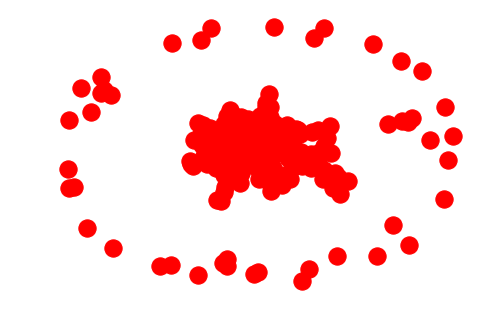

In [10]:
nx.draw(nx.erdos_renyi_graph(n,p))

In [32]:
p_values = np.linspace(1e-6, 1e-1, 30) # we see the critical value for p is less than 0.1, so we only plot between 0 and 0.1
average_size = []
for p_tmp in p_values:
    mean = 0
    for k in range(20):
        mean += len(max(nx.connected_component_subgraphs(nx.erdos_renyi_graph(n,p_tmp)), key=len))
    mean /= 30
    
    average_size.append(mean)

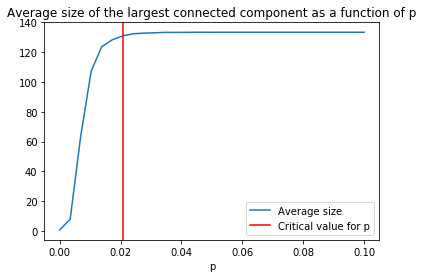

In [51]:
plt.figure()
plt.title('Average size of the largest connected component as a function of p')
plt.xlabel('p')

plt.plot(p_values, average_size, label='Average size')
plt.axvline(p_values[np.argmax(np.abs(np.gradient(average_size) < 3))], c='r', label='Critical value for p')

plt.legend(loc='best')
plt.show()

The critical value for $p$ is around $0.02$.

In [35]:
average_degree = []
n_p = []

for p_tmp in p_values[1:]:
    graph_tmp = nx.erdos_renyi_graph(n, p_tmp)
    largest_connected_component = max(nx.connected_component_subgraphs(graph_tmp), key=len)
    
    average_degree.append(np.array(largest_connected_component.degree)[:,1].mean())
    n_p.append(n*p_tmp)

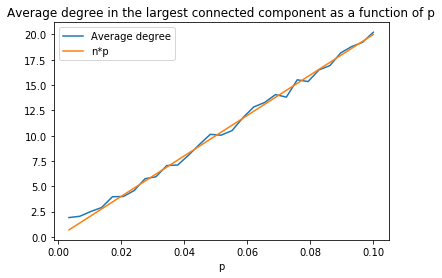

In [36]:
plt.figure()
plt.title('Average degree in the largest connected component as a function of p')
plt.xlabel('p')

plt.plot(p_values[1:], average_degree, label='Average degree')
plt.plot(p_values[1:], n_p, label='n*p')

plt.legend(loc='best')
plt.show()

The average degree of nodes belongoing to the largested connected component is very close to the value of $np$.

## 2. Preferential attachment

The degree distribution of an Erdos-Renyi graph is approximately binomial (for large n), as shown below.

In [52]:
n = 200
p = 0.02
graph = nx.erdos_renyi_graph(n, p)

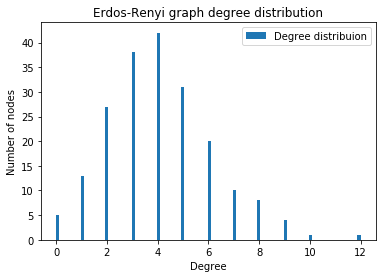

In [53]:
degrees = [graph.degree(u) for u in graph.nodes()]

plt.figure()
plt.title('Erdos-Renyi graph degree distribution')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')

plt.hist(degrees, bins=100, label='Degree distribuion')

plt.legend(loc='best')
plt.show()

The Barabasi-Albert model, based on the principle of **preferential attachment**, provides a random graph with a **power-law** degree distribution.

In [54]:
n = 200
d = 3 # degree of new nodes
graph = nx.barabasi_albert_graph(n, d) 
graph.add_edges_from(nx.complete_graph(d).edges()) # adding the initial clique (removed by networkx)

In [55]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 200
Number of edges: 594
Average degree:   5.9400


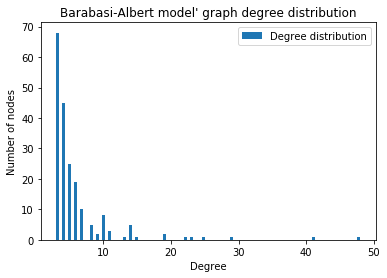

In [56]:
degrees = [graph.degree(u) for u in graph.nodes()]

plt.figure()
plt.title('Barabasi-Albert model\' graph degree distribution')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')

plt.hist(degrees, bins=100, label='Degree distribution')

plt.legend(loc='best')
plt.show()

## To do

* Code a function that generates a Barabasi-Albert graph starting from any initial graph (not necessarily a clique).
* Test your code on various initial graphs of 4 nodes.

In [57]:
def general_barabasi_albert_graph(n, d, init_graph):
    # init_graph must be connected and must have between d and n nodes 
    graph = init_graph.copy()
    next_ind = max(graph.nodes()) + 1

    for t in range(n-d):
        proba = np.array([graph.degree(u) for u in graph.nodes()])
        proba = proba / np.sum(proba)
        
        clique = np.random.choice(graph.nodes(), d, replace=False, p=proba)
        edges = [(clique[i], next_ind) for i in range(d)]
        graph.add_edges_from(edges)
        next_ind += 1
    return graph    

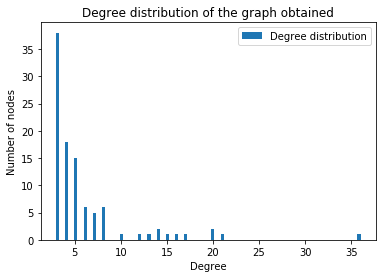

In [58]:
# To check
graph = general_barabasi_albert_graph(100, 3, nx.complete_graph(3))
degrees = [graph.degree(u) for u in graph.nodes()]

plt.figure()
plt.title('Degree distribution of the graph obtained')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')

plt.hist(degrees, bins=100, label='Degree distribution')

plt.legend(loc='best')
plt.show()

## 3. Configuration model

We now focus on graphs with some given degree sequence. The Havel-Hakimi algorithm generates such a graph provided the degree sequence is valid (that is, **graphical**); otherwise, it returns an error. The resulting graph is not necessarily connected.

In [59]:
graph = nx.havel_hakimi_graph([2, 2, 2])

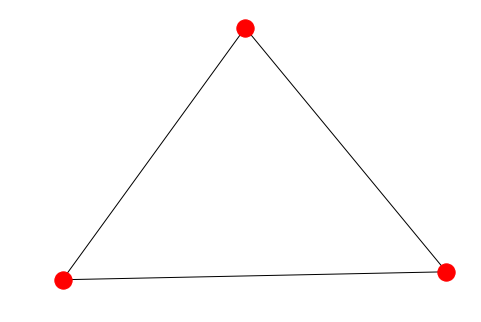

In [60]:
nx.draw(graph)

## To do 

* Test various degree sequences (you may get valid sequences from actual graphs, see the [networkx graph generators](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html))

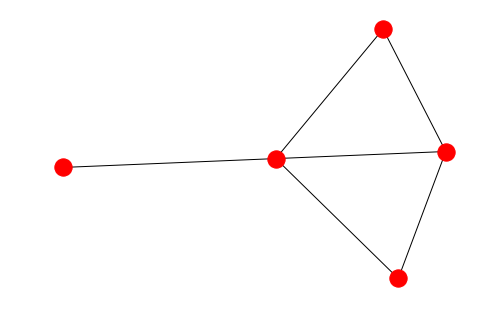

In [61]:
nx.draw(nx.havel_hakimi_graph([2, 2, 3, 4, 1]))

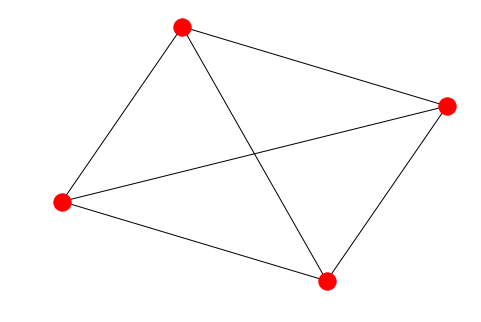

In [62]:
nx.draw(nx.havel_hakimi_graph([3, 3, 3, 3]))

## Les Misérables

Les Misérables is a graph connecting the characters of the novel of Victor Hugo when they appear in the same chapter. The graph is undirected and weighted. Weights correspond to the number of chapters in which characters appear together.

Graph: [Download](http://perso.telecom-paristech.fr/~bonald/graphs/miserables.graphml.gz)

Source: [Source](https://fr.wikisource.org/wiki/Les_Misérables)

In [68]:
miserables = nx.read_graphml("miserables.graphml", node_type=int)

In [69]:
print(nx.info(miserables))

Name: Les Miserables
Type: Graph
Number of nodes: 77
Number of edges: 254
Average degree:   6.5974


In [70]:
names = nx.get_node_attributes(miserables, 'name')

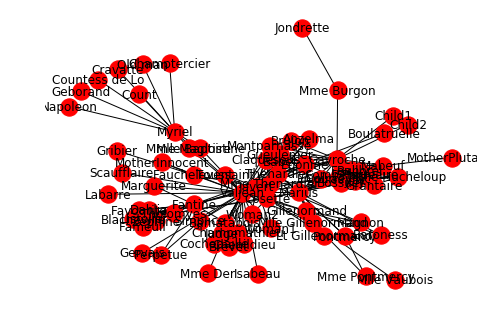

In [71]:
nx.draw(miserables, labels=names)

## To do

* Generate the Havel-Hakimi graph associated with the degree sequence of Les Miserables.
* How many connected components are there in this graph?
* How many common edges are there with the original graph?

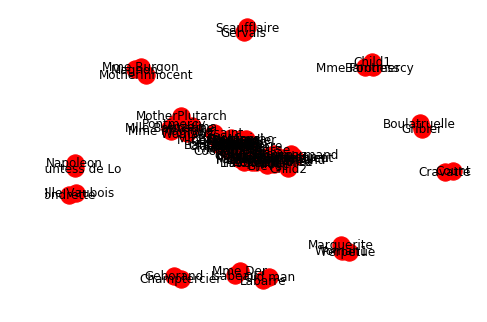

In [115]:
mis_degrees = [miserables.degree(u) for u in miserables.nodes()]
miserables_hh = nx.havel_hakimi_graph(mis_degrees)

nx.draw(miserables_hh, labels=names)

In [76]:
print('There are {} connected components in this graph'.format(len([graph for graph in nx.connected_component_subgraphs(miserables_hh)])))

There are 12 connected components in this graph


In [79]:
common_edges = 0

for edge in miserables.edges():
    if edge in miserables_hh.edges():
            common_edges += 1

print('The two graphs have {} common edges'.format(common_edges))

The two graphs have 94 common edges


## Configuration model

The configuration model generates a random  instance of a **multi-graph** with some given  degree sequence. Any sequence of even sum is valid. Self-loops and multi-edges must be removed to get a simple graph.

In [84]:
config = nx.configuration_model([2, 4])

In [85]:
print(nx.info(config))

Name: 
Type: MultiGraph
Number of nodes: 2
Number of edges: 3
Average degree:   3.0000


In [88]:
graph = nx.Graph(config)
graph.remove_edges_from(config.selfloop_edges())

In [89]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000


## To do

* Test various degree sequences.
* Generate random configurations associated with the degree sequence of Les Miserables.
* What is the average number of common edges with the original graph?
* What is the average number of common edges between the original graph of Les Miserables and an Erdos-Renyi graph of the same size (77 nodes and 254 edges on average)?
* Interpret the results.

Name: 
Type: MultiGraph
Number of nodes: 5
Number of edges: 14
Average degree:   5.6000


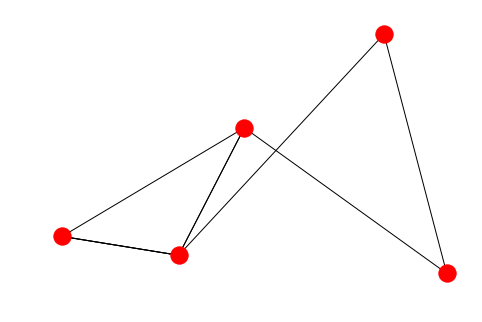

In [112]:
config = nx.configuration_model([2, 2, 4, 8, 12])

print(nx.info(config))
nx.draw(config)

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 6
Average degree:   2.4000


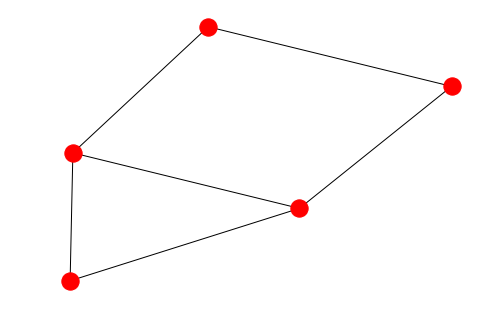

In [114]:
graph = nx.Graph(config)
graph.remove_edges_from(config.selfloop_edges())

print(nx.info(graph))
nx.draw(graph)

Name: 
Type: MultiGraph
Number of nodes: 77
Number of edges: 254
Average degree:   6.5974


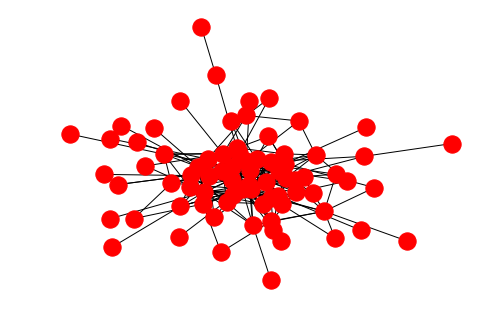

In [134]:
mis_config = nx.configuration_model(mis_degrees)

print(nx.info(mis_config))
nx.draw(mis_config)

Name: 
Type: Graph
Number of nodes: 77
Number of edges: 222
Average degree:   5.7662


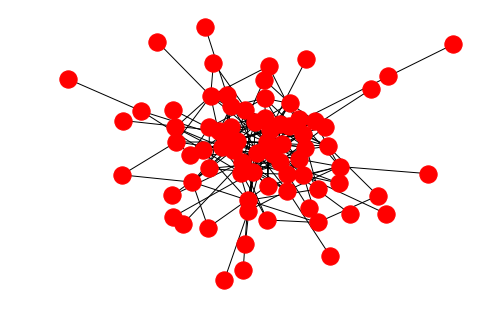

In [135]:
mis_graph = nx.Graph(mis_config)
mis_graph.remove_edges_from(mis_config.selfloop_edges())

print(nx.info(mis_graph))
nx.draw(mis_graph)

In [203]:
average_common_edges = 0

for k in range(50):
    mis_configuration = nx.configuration_model(mis_degrees)
    common_edges = 0

    for edge in miserables.edges():
        if edge in mis_configuration.edges():
                common_edges += 1

    average_common_edges += common_edges

average_common_edges /= 50

print('The average number of common edges between a random configuration and the original graph is: {}'.format(average_common_edges))

The average number of common edges between a random configuration and the original graph is: 54.56


In [204]:
n = 77
p = 2*254 / (n*(n-1))

average_common_edges = 0

for k in range(50):
    erdos_renyi = nx.erdos_renyi_graph(n, p)
    common_edges = 0

    for edge in miserables.edges():
        if edge in erdos_renyi.edges():
                common_edges += 1

    average_common_edges += common_edges

average_common_edges /= 50

print('The average number of common edges between an Erdos-Renyi graph and the original graph is: {}'.format(average_common_edges))

The average number of common edges between an Erdos-Renyi graph and the original graph is: 21.16
